## Creating Your Own Dataset 

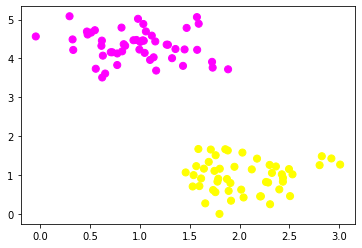

In [15]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
  
# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')
plt.show() 

## Apply SVM

In [19]:
# import support vector classifier 
# "Support Vector Classifier"
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X, Y) 

SVC(kernel='linear')

## Plot the Output

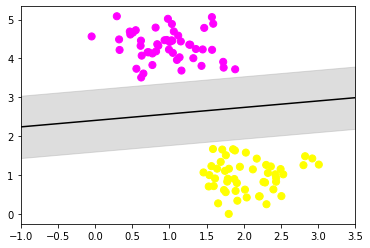

In [23]:
##creating linspace between -1 to 3.5 
import numpy as np
xfit = np.linspace(-1, 3.5)
  
# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')
d = 0.8
# plot a line between the different sets of data
for b, (m, c) in zip(clf.intercept_, clf.coef_):
    yfit = (-m/c) * xfit + (-b/c)
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 
    color='#AAAAAA', alpha=0.4)
  
plt.xlim(-1, 3.5);
plt.show()

## Predict a new sample

In [26]:
clf.predict([[1, 3]])

array([0])

# Apply SVM on Real data

## Using Cancer data for classification

In [27]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
# reading csv file and extracting class column to y.
x = pd.read_csv("cancer.csv")
a = np.array(x)
y  = a[:,29] # classes having 0 and 1
  
# extracting two features
x = np.column_stack((x.perimeter_mean,x.area_mean))

### Optional - If you need the data in numerical format

In [ ]:
# y = np.array(pd.get_dummies(y).iloc[:,1])

## Printing the data

In [31]:
# 569 samples and 2 features
print(x.shape)
print("-----------------------------------------------------------------------------------------")
print("Input", x)
print("-----------------------------------------------------------------------------------------")
print("Class",y)

(569, 2)
-----------------------------------------------------------------------------------------
Input [[ 122.8  1001.  ]
 [ 132.9  1326.  ]
 [ 130.   1203.  ]
 ...
 [ 108.3   858.1 ]
 [ 140.1  1265.  ]
 [  47.92  181.  ]]
-----------------------------------------------------------------------------------------
Class ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' '

## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

## Apply SVM

In [33]:
# import support vector classifier 
# "Support Vector Classifier"
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

SVC(kernel='linear')

## Predict the new sample

In [34]:
y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report: \n ########################################################################### \n", classification_report(y_test,y_pred),"\n ########################################################################### \n")
print("Confusion Matrix: \n ########################################################################### \n",confusion_matrix(y_test,y_pred),"\n ########################################################################### \n")
print("Accuracy:",accuracy_score(y_test,y_pred))

Classification Report: 
 ########################################################################### 
               precision    recall  f1-score   support

           B       0.90      0.99      0.94        71
           M       0.97      0.81      0.89        43

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114
 
 ########################################################################### 

Confusion Matrix: 
 ########################################################################### 
 [[70  1]
 [ 8 35]] 
 ########################################################################### 

Accuracy: 0.9210526315789473


In [38]:
clf.predict([[120, 990]])

array(['M'], dtype=object)

In [40]:
clf.predict([[100, 550]])

array(['M'], dtype=object)

## Feature Scaling based Approach

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

In [49]:
clf.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [50]:
y_pred = clf.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report: \n ########################################################################### \n", classification_report(y_test,y_pred),"\n ########################################################################### \n")
print("Confusion Matrix: \n ########################################################################### \n",confusion_matrix(y_test,y_pred),"\n ########################################################################### \n")
print("Accuracy:",accuracy_score(y_test,y_pred))

Classification Report: 
 ########################################################################### 
               precision    recall  f1-score   support

           B       0.90      0.99      0.94        71
           M       0.97      0.81      0.89        43

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114
 
 ########################################################################### 

Confusion Matrix: 
 ########################################################################### 
 [[70  1]
 [ 8 35]] 
 ########################################################################### 

Accuracy: 0.9210526315789473


In [54]:
clf.predict([[120, 990]])

array(['M'], dtype=object)

In [55]:
clf.predict([[85, 550]])

array(['B'], dtype=object)